### Leaf classifier - multinomial classifier (to classify 99 classes)

#### Input data of two forms - i) excel file with features for every record ii) black and white leaf image corresponding to each record

##### Approach:

1) Different types of models are tried form basic logistic regression to RF and SVM.
2) Initially the model is run on non-image features to get a sense of accuracy as compared to using holistic list of features
3) Log-loss is the metric used to evaluate the result
4) Regularization and standardization is done to improve the accuracy significantly
5) Various features from image is extracted to reduce the log-loss

##### Further approaches
6) Ensembling can be done to predict better results
7) Feature engineering can be done to extract various useful features from the image

In [2]:
import pandas as pd
import os
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import numpy
import random

os.chdir('C:/Users/e7izr5t/Desktop/Leaf classification/')
#os.chdir('C:/Users/Arvind/Desktop/kaggle/Leaf classification')

%matplotlib inline

In [5]:
os.listdir(os.getcwd())

['classification code.py',
 'images',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [6]:
leaf_train = pd.read_csv('./train.csv/train.csv')
leaf_test = pd.read_csv('./test.csv/test.csv')


leaf_train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0,0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0,0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0,0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0,0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0,0,0.000000,0.000000,0.031250


#### Encoding the classes

1) The names of the classes are encoded into numeric values to ease the process.
2) Tran and test data are separarted into two parts. (depenedent and indepeneded variables)
3) Standardization is performed (x - mu/ sigma)


In [ ]:


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(leaf_train['species'])
y_train = le.transform(leaf_train['species'])
#le.classes_

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(leaf_train.drop(['id', 'species'], axis=1).values)
#x_train = scaler.transform(leaf_train.drop(['id', 'species'], axis=1).values)
x_train = leaf_train.drop(['id', 'species'], axis=1).values
x_train_scaler = scaler.transform(leaf_train.drop(['id', 'species'], axis=1).values)

scaler_test = StandardScaler().fit(leaf_test.drop(['id'], axis = 1).values)
leaf_test_x = scaler_test.transform(leaf_test.drop(['id'], axis = 1).values)


ltrain_x = x_train_scaler
ltrain_y = y_train
sum(leaf_train['species'].value_counts() == 10)

#### Function to calculate log-loss

In [9]:
#Function to calculate logloss
def log_loss_fn(model, test_data, test_label):
    df = pd.DataFrame(model.predict_proba(test_data), columns = le.classes_)
    y_actual = le.inverse_transform(test_label)
    log_loss = 0
    count = 0
    for i in range(0,df.shape[0]):
        count = count + 1
        log_loss_temp = numpy.log(df.loc[i,y_actual[i]])
        log_loss = log_loss + log_loss_temp
    return -1 * log_loss/count 

#### Logistic Regression

1) With and without standardization and regularization


In [10]:
######### Logistic Regression
##Checking the scores without regularization and standardization

for i in range(0,3):
    
    X_train, X_test, y_train, y_test = train_test_split(x_train, ltrain_y, test_size = 0.3, random_state = i * 10,stratify=ltrain_y)

    lr_model = LogisticRegression(multi_class = "multinomial", penalty = 'l2',solver = "sag",random_state = i).fit(X_train, y_train)
    print (lr_model.score(X_test, y_test))
    print ("Loss loss: ",log_loss_fn(lr_model,X_test,y_test))
    # Score  -- sum(lr_model.predict(X_test) == y_test)/float(len(lr_model.predict(X_test) == y_test))



0.572390572391
('Loss loss: ', 4.2229123054158393)
0.585858585859
('Loss loss: ', 4.2223360227655293)
0.565656565657
('Loss loss: ', 4.2217997863314549)


In [15]:
### Test 
log_loss_fn(lr_model,X_test,y_test)

#Splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(ltrain_x, ltrain_y, test_size = 0.3, random_state = 9,stratify=ltrain_y)

In [27]:
######### Logistic Regression
##Checking the scores without regularization but standardization

for i in range(0,3):
    
    X_train, X_test, y_train, y_test = train_test_split(ltrain_x, ltrain_y, test_size = 0.3, random_state = i * 10,stratify=ltrain_y)

    lr_model = LogisticRegression(multi_class = "multinomial", penalty = 'l2',solver = "sag",random_state = i).fit(X_train, y_train)
    print (lr_model.score(X_test, y_test))
    print ("Loss loss: ",log_loss_fn(lr_model,X_test,y_test))
    # Score  -- sum(lr_model.predict(X_test) == y_test)/float(len(lr_model.predict(X_test) == y_test)

0.983164983165
('Loss loss: ', 0.13196865336074282)
0.993265993266
('Loss loss: ', 0.1326306141069718)
0.989898989899
('Loss loss: ', 0.13416012433220573)


In [427]:
### Using Regularization !Computationally intensive
        
lr_reg_model = LogisticRegression(multi_class = "multinomial", solver = "lbfgs")
parameters = {'C':[100,1000], 'tol': [0.001,0.0001]}

gridsearch_model = GridSearchCV(lr_reg_model, parameters, cv = 5, scoring = 'neg_log_loss')

X_train, X_test, y_train, y_test = train_test_split(ltrain_x, ltrain_y, test_size = 0.3, random_state = 10,stratify=ltrain_y)
gridsearch_model.fit(X_train, y_train).score(X_test,y_test)

-0.024829143627089999

In [338]:
#Getting the scores
print(gridsearch_model.grid_scores_)
log_loss_fn(gridsearch_model,X_test, y_test)

C:\Users\e7izr5t\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.14372, std: 0.03446, params: {'C': 100, 'tol': 0.001}, mean: -0.14351, std: 0.03337, params: {'C': 100, 'tol': 0.0001}, mean: -0.14239, std: 0.03352, params: {'C': 1000, 'tol': 0.001}, mean: -0.14353, std: 0.03465, params: {'C': 1000, 'tol': 0.0001}, mean: -0.14354, std: 0.03373, params: {'C': 5000, 'tol': 0.001}, mean: -0.14356, std: 0.03530, params: {'C': 5000, 'tol': 0.0001}]


0.098752103562019869

#### Random forest

In [12]:
## Randomm forest

rf_model = RandomForestClassifier(n_estimators = 500,min_samples_leaf = 1, n_jobs = -1,random_state = 0 )
rf_model.fit(X_train, y_train)

#Trying fitting with different parameters for RF



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [13]:
log_loss_fn(rf_model,X_test, y_test) #The values are pretty high

0.82242988849745213

In [14]:
sum(rf_model.predict(X_test) == y_test) / float(len(y_test)) # Good accuacy though

0.97643097643097643

In [380]:
rf = rf_model

#We extract the importances, their indices and standard deviations
importances = rf.feature_importances_
indices = numpy.argsort(importances)[::-1]
imp_std = numpy.std([est.feature_importances_ for est in rf.estimators_], axis=0)

#### SVM

In [42]:
# Trying out SVM

svm_model = svm.SVC(probability = True,random_state = 0, C = 100)
svm_model.fit(X_train, y_train)


print sum(svm_model.predict(X_test)== y_test) / float(len(y_test))

#Comparing the log loss between SVM and Ranfom forest model
print log_loss_fn(svm_model,X_test, y_test)
print log_loss_fn(rf_model,X_test, y_test)

#SVM has very high log loss

0.996632996633
2.49841599274
0.433001708262


In [57]:
#Comparing linear and ply kernals
svm_model_linear = svm.SVC(probability = True,random_state = 0, kernel = 'linear')
svm_model_linear.fit(X_train, y_train)

print ("Accuracy: ",sum(svm_model_linear.predict(X_test)== y_test) / float(len(y_test)))
print ("Log loss: ", log_loss_fn(svm_model_linear,X_test, y_test))

########### Poly
svm_model_poly = svm.SVC(probability = True,random_state = 0, kernel = 'poly', degree = 3)
svm_model_poly.fit(X_train, y_train)

print ("Accuracy: ",sum(svm_model_poly.predict(X_test)== y_test) / float(len(y_test)))
print ("Log loss: ", log_loss_fn(svm_model_poly,X_test, y_test))

#Observation: If the degree value is increased, the accuracy goes on decreasing indicating that
# the decision boundary is not multi-dimensional

('Accuracy: ', 0.99663299663299665)
('Log loss: ', 2.4572109178504875)
('Accuracy: ', 0.86868686868686873)
('Log loss: ', 2.8452806940388604)


In [ ]:
max_values = numpy.apply_along_axis(lambda x: max(x) - min(x),1,svm_model.predict_proba(X_train))
len(max_values)

max_values

#### Comparison of results

In [ ]:
#Analysing the range of probabilities for each record
rf_range = numpy.apply_along_axis(lambda x: max(x) - min(x),1,rf_model.predict_proba(X_train))

lr_range = numpy.apply_along_axis(lambda x: max(x) - min(x),1,lr_model.predict_proba(X_train))

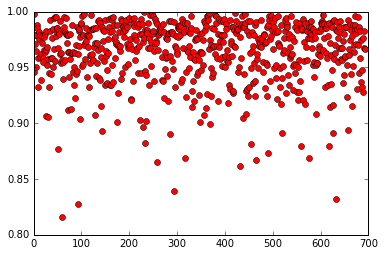

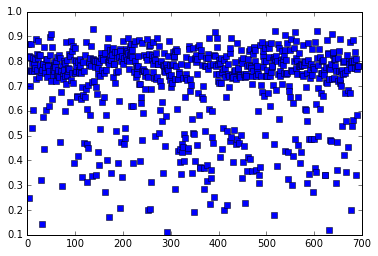

In [92]:
plt.plot(lr_range, 'ro')
plt.show()

plt.plot(rf_range, 'bs')
plt.show()

#plt.plot(range(0,length(rf_range)),rf_range, 'ro',range(0,length(lf_range)),lr_range, 'bs')


In [128]:
print sum(lr_range < 0.95)/float(len(rf_range))
print sum(lr_range < 0.95)

#From the plots, the probability values of logistic regression seem really good. Most likely the features space have a 
#linear decision boundary because of which RF is not outperforming LR

#But there are about ~22 % of the records which have lesser range of values in LR probabilities. Let's see if they have
#some similarity. 

from collections import Counter
Counter(le.inverse_transform(y_train[lr_range < 0.90]))

#Observation: Looking at the non-perfect records, each belong to a different class rendering no connectiong among them
#Now, let's include more features by reading the images

0.226551226551
157


Counter({'Acer_Opalus': 1,
         'Arundinaria_Simonii': 1,
         'Eucalyptus_Glaucescens': 1,
         'Eucalyptus_Neglecta': 2,
         'Eucalyptus_Urnigera': 2,
         'Lithocarpus_Edulis': 1,
         'Magnolia_Heptapeta': 2,
         'Prunus_X_Shmittii': 1,
         'Quercus_Coccifera': 1,
         'Quercus_Coccinea': 1,
         'Quercus_Infectoria_sub': 1,
         'Quercus_Kewensis': 3,
         'Quercus_Phillyraeoides': 1,
         'Quercus_Shumardii': 1,
         'Quercus_Suber': 1,
         'Quercus_x_Hispanica': 1,
         'Viburnum_Tinus': 1})

### Image data

Dimension  (467L, 526L)


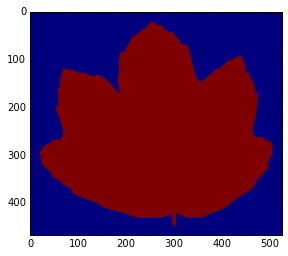

In [169]:
#Reading sample file from the document
from PIL import Image
from matplotlib.pyplot import imshow

im1 = Image.open('.\\images\\1.jpg','r')
imshow(numpy.array(im1))

print "Dimension ",numpy.array(im1).shape

In [347]:
#### ! Computationally intensive 

import re
files = os.listdir(os.getcwd() + '\\images\\')
str(re.findall('\d+',files[1]))

img_attribute = pd.DataFrame()
pca_feature = pd.DataFrame()
resize_size = 50,50

for each_image in files:
    file_name = ".\\images\\" + each_image
    image_file =Image.open(file_name,'r')
    image_id = re.findall('\d+',file_name)
    
    
    ## Image attributes
    img_np = numpy.array(image_file).shape
    image_df = pd.DataFrame({'height' : img_np[0], 'width' : img_np[1], 'Square' :  img_np[0] * img_np[1],
                             'aspect_ration': img_np[0] / img_np[1] , 'orientation': int(img_np[0] > img_np[1]) },
                              index = image_id)
    img_attribute = pd.concat([img_attribute,image_df], axis = 0)
    
    ## Resize feature
    resize_image = image_file.resize(resize_size, Image.ANTIALIAS)
    pca_temp = pd.DataFrame(numpy.ravel(resize_image)).T
    pca_temp.index = image_id
    pca_feature = pd.concat([pca_feature, pca_temp], axis = 0)
    
    
####

In [357]:
#Check if matching with the number of records
print img_attribute.shape
print leaf_train.shape[0] + leaf_test.shape[0]
pca_feature.head()

(1584, 5)
1584


,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Principal component analysis

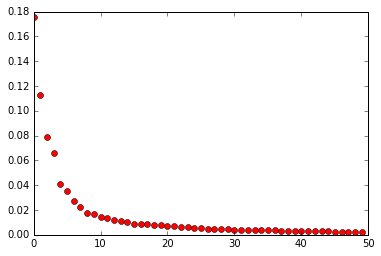

In [359]:
# Implementing PCA

pca_model = PCA(n_components = 50).fit(pca_feature)
plt.plot(pca_model.explained_variance_ratio_, 'ro')
plt.show()

In [408]:
pca_out = pd.DataFrame(pca_model.transform(pca_feature), index = pca_feature.index)

image_feature_extraction = img_attribute.join(pca_out)

#leaf_train = pd.read_csv('./train.csv/train.csv')
#leaf_test = pd.read_csv('./test.csv/test.csv')
leaf_train.index = leaf_train[['id']]
leaf_test.index = leaf_test[['id']]

#Making index of the same data type
leaf_train.index = [int(x) for x in leaf_train.index]
leaf_test.index = [int(x) for x in leaf_test.index]
image_feature_extraction.index =  [int(x)  for x in image_feature_extraction.index]

#image_feature_extraction.head()
final_train_data_set = leaf_train.join(image_feature_extraction)
final_test_data_set = leaf_test.join(image_feature_extraction)

In [410]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(final_train_data_set['species'])
y_train = le.transform(final_train_data_set['species'])
#le.classes_

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(final_train_data_set.drop(['id', 'species'], axis=1).values)
#x_train = scaler.transform(leaf_train.drop(['id', 'species'], axis=1).values)
x_train = final_train_data_set.drop(['id', 'species'], axis=1).values
x_train_scaler = scaler.transform(final_train_data_set.drop(['id', 'species'], axis=1).values)

scaler_test = StandardScaler().fit(final_test_data_set.drop(['id'], axis = 1).values)
leaf_test_x = scaler_test.transform(final_test_data_set.drop(['id'], axis = 1).values)


ltrain_x = x_train_scaler
ltrain_y = y_train
sum(final_train_data_set['species'].value_counts() == 10)

99

In [411]:
######### Logistic Regression
##Checking the scores without regularization and standardization

for i in range(0,3):
    
    X_train, X_test, y_train, y_test = train_test_split(x_train, ltrain_y, test_size = 0.3, random_state = i * 10,stratify=ltrain_y)

    lr_model = LogisticRegression(multi_class = "multinomial", penalty = 'l2',solver = "sag",random_state = i).fit(X_train, y_train)
    print (lr_model.score(X_test, y_test))
    print ("Loss loss: ",log_loss_fn(lr_model,X_test,y_test))
    # Score  -- sum(lr_model.predict(X_test) == y_test)/float(len(lr_model.predict(X_test) == y_test))

0.010101010101
('Loss loss: ', 4.4930121381933077)
0.010101010101
('Loss loss: ', 4.4862350203521446)
0.010101010101
('Loss loss: ', 4.4898220762288208)


In [412]:
######### Logistic Regression
##Checking the scores without regularization but standardization

for i in range(0,3):
    
    X_train, X_test, y_train, y_test = train_test_split(ltrain_x, ltrain_y, test_size = 0.3, random_state = i * 10,stratify=ltrain_y)

    lr_model = LogisticRegression(multi_class = "multinomial", penalty = 'l2',solver = "sag",random_state = i).fit(X_train, y_train)
    print (lr_model.score(X_test, y_test))
    print ("Loss loss: ",log_loss_fn(lr_model,X_test,y_test))
    # Score  -- sum(lr_model.predict(X_test) == y_test)/float(len(lr_model.predict(X_test) == y_test))

0.996632996633
('Loss loss: ', 0.11632387157731879)
0.993265993266
('Loss loss: ', 0.11675224262189349)
0.996632996633
('Loss loss: ', 0.1170479360264076)


In [413]:
### Using Regularization !Computationally intensive
        
lr_reg_model = LogisticRegression(multi_class = "multinomial", solver = "lbfgs")
parameters = {'C':[100, 1000], 'tol': [0.001, 0.0001]}

gridsearch_model = GridSearchCV(lr_reg_model, parameters, cv = 5, scoring = 'neg_log_loss')

X_train, X_test, y_train, y_test = train_test_split(ltrain_x, ltrain_y, test_size = 0.3, random_state = 10,stratify=ltrain_y)
gridsearch_model.fit(X_train, y_train).score(X_test,y_test)

-0.084965328951250974

In [414]:
#Getting the scores
print(gridsearch_model.grid_scores_)
log_loss_fn(gridsearch_model,X_test, y_test)

[mean: -0.12624, std: 0.01988, params: {'C': 100, 'tol': 0.001}, mean: -0.12607, std: 0.01962, params: {'C': 100, 'tol': 0.0001}, mean: -0.12573, std: 0.02044, params: {'C': 1000, 'tol': 0.001}, mean: -0.12588, std: 0.01999, params: {'C': 1000, 'tol': 0.0001}, mean: -0.12496, std: 0.01807, params: {'C': 5000, 'tol': 0.001}, mean: -0.12487, std: 0.01946, params: {'C': 5000, 'tol': 0.0001}]


C:\Users\Arvind\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


0.084965328951251029

In [424]:
### Training with entire data - Takes over 5 mins

numpy.random.seed(0)

lr_reg_model = LogisticRegression(multi_class = "multinomial", solver = "lbfgs")
parameters = {'C':[100, 1000], 'tol': [0.001, 0.0001]}
gridsearch_model_final = GridSearchCV(lr_reg_model, parameters, cv = 5, scoring = 'neg_log_loss')

gridsearch_model_final.fit(ltrain_x, ltrain_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [100, 1000], 'tol': [0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=0)

In [425]:
#Creating submissio file
y_test = gridsearch_model_final.predict_proba(leaf_test_x)
submission = pd.DataFrame(y_test, index=leaf_test['id'], columns=le.classes_)
submission.to_csv('submission_14_05_17_v3.csv')

### Final log-loss result 0.0143 (Kaggle ranking ~147 - Top 9%)

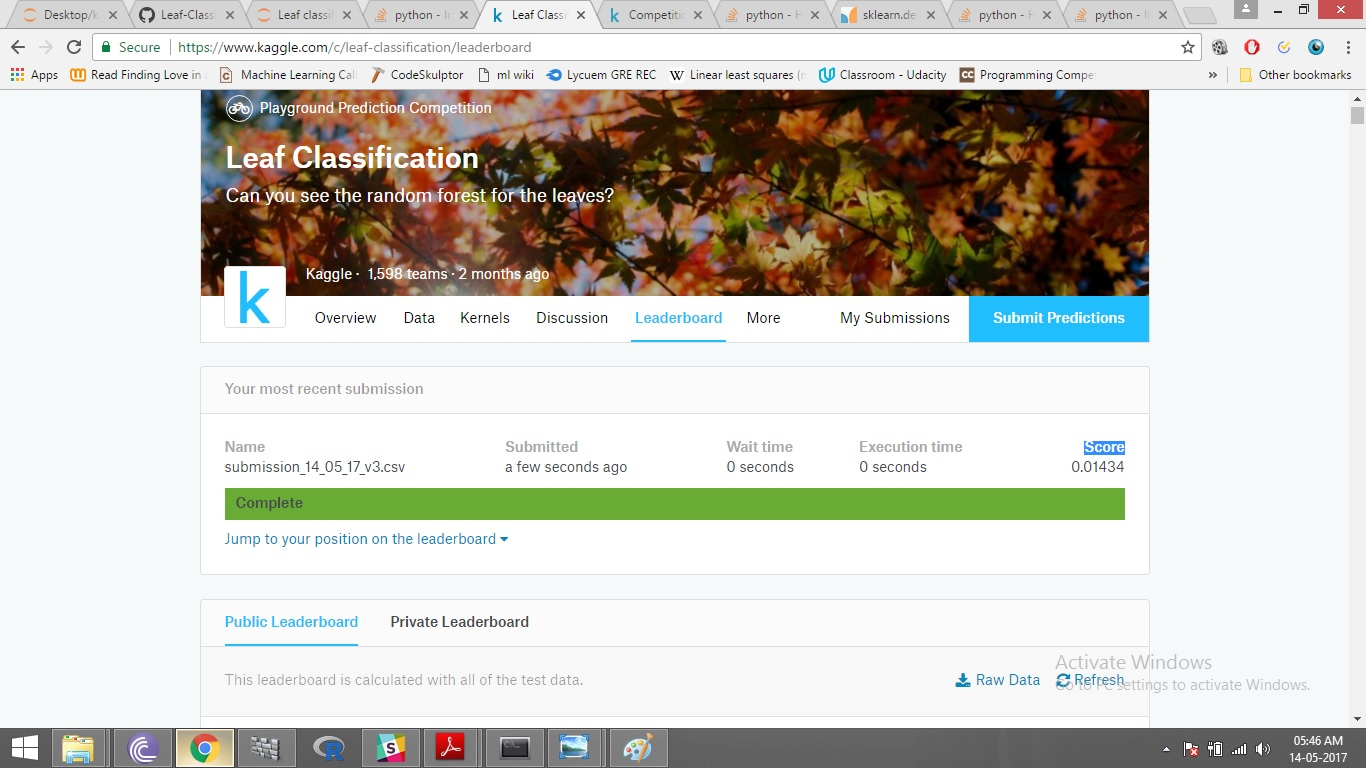

In [428]:
from IPython.display import Image
Image(filename='kaggle score.jpg')

In [46]:
####Next steps --- To improve the accuracy further
# Identify the recordss giving very bad logloss - use RF to train those datasets where the prediction accuracy is uncertain;
#there will be classes where the prediction accuracy will be erratic. Those are the focus area; effectively the prediction should
#be ~1 in the required class and should be almost zero for all the other classes

#Pick out those classses - train them separately by RF and go ahead

# Effectively in the test data - Give the output prob with logistic regression - use RF whereever the prediction accuracy
# is not good

### After completion 
# Try XGBoost
# See the difference in accuracy results
# Go through kaggle and see a good featured competition to start with